In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [85]:
df = pd.read_csv('spotify_songs.csv')
df.dropna(inplace=True)
df.drop(columns=['track_id','track_album_id','playlist_id'],axis=1,inplace=True)
categorical_columns = [ 'track_artist','track_name' ,'track_album_name','track_album_release_date','playlist_name', 'playlist_genre', 'playlist_subgenre']
# df.drop(['track_id','track_album_id','playlist_id','track_name', 'track_artist', 'track_album_name','track_album_release_date', 'playlist_name', 'playlist_genre', 'playlist_subgenre'],axis=1,inplace=True)

for col in categorical_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])


fields were dropped as they are indexes that are used to index the track, album and playlist. The other character fields were converted to numerical categorical values to allow for processing in the model. 

In [87]:
X = df.drop('track_popularity', axis=1) 
col=X.columns
X=StandardScaler().fit_transform(X)
X=pd.DataFrame(X,columns=col) # Independent variables (features)
y = df['track_popularity'] 

the field, track_popularity was used as the dependent variable(target variable), when the model results and r2 score indicated that the model did not fit well to the data and considering that neither the dataset nor the assignment indicated which is the target variable, my own discretion was used. 

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)


A random forest model was used which is a supervised learning model, that is able to determine feature importance

In [89]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print(f"MAE:{mae:.2f}")
print(f"R2:{r2:.2f}")

MAE:19.79
R2:-0.41


these scores were mainly used to evaluate the model when predicting track popularity as it had a r2 score of -0.8 and mae of 20 when using track popularity as the target variable. 

In [90]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.26


Incredibily high accuracy when predicting playlist genre

In [91]:
feature_importances = rf_model.feature_importances_
feature_importances

array([0.05925508, 0.05937507, 0.06079386, 0.06826214, 0.0529566 ,
       0.01858205, 0.02998273, 0.06074363, 0.05910593, 0.04165218,
       0.0616799 , 0.01434608, 0.06124682, 0.06058712, 0.04475226,
       0.06151201, 0.06050629, 0.06224824, 0.06241201])

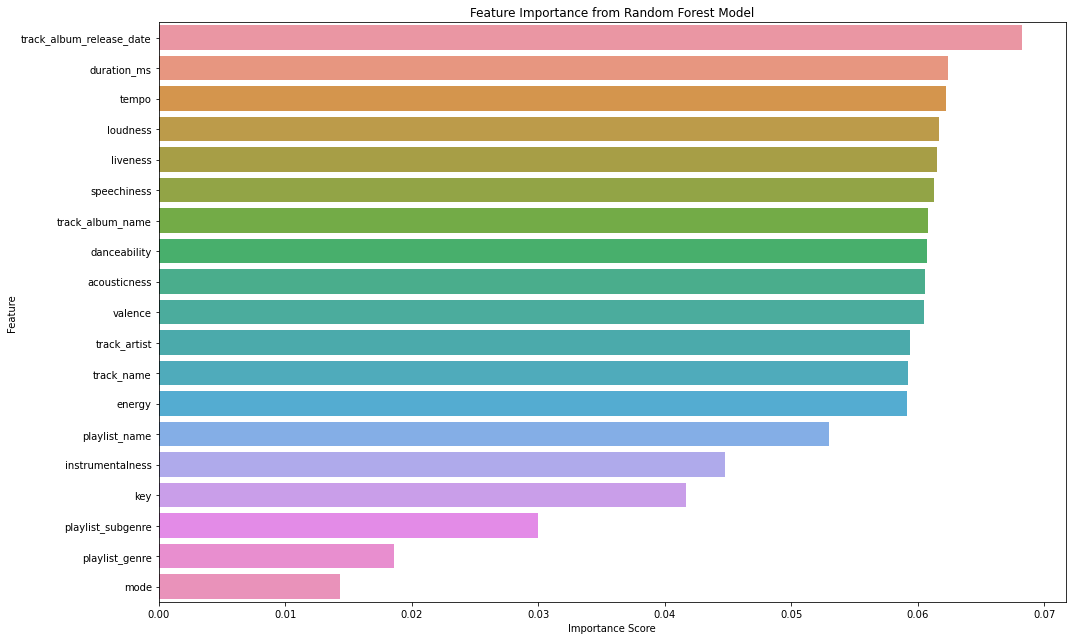

In [92]:
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance using a bar plot
plt.figure(figsize=(15, 9))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, )
plt.title('Feature Importance from Random Forest Model')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

From the above graph the order of feature importance is:
track_album_release_date
duration_ms
tempo
loudness
liveness
speechiness
track_album_name
danceability
acousticness
valence
track artist
track_name
energy
playlist_name
instrumentalness
key
playlist_subgenre
playlist_genre
mode